In [ ]:
#mount your data here

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#other libraries
import numpy as np
import random
import collections

print(tf.__version__)

2.8.0


In [2]:
#loading database
A = np.loadtxt("/content/datasets.txt")
#separating questions from answers using columns
X = A[:,:9]      
y = A[:,9:]

#checks in each example which player (X or O) wins
def checkforWin(x, board):
    if board[0] == x and board[1] == x and board[2] == x: #win case
        tempBoard = [0, 1, 2] #array containing win case
        return 1, tempBoard #returns result and win case
    if board[3] == x and board[4] == x and board[5] == x:
        tempBoard = [3, 4, 5]
        return 2, tempBoard
    if board[6] == x and board[7] == x and board[8] == x:
        tempBoard = [6, 7, 8]
        return 3, tempBoard
    if board[0] == x and board[3] == x and board[6] == x:
        tempBoard = [0, 3, 6]
        return 4, tempBoard
    if board[1] == x and board[4] == x and board[7] == x:
        tempBoard = [1, 4, 7]
        return 5, tempBoard
    if board[2] == x and board[5] == x and board[8] == x:
        tempBoard = [2, 5, 8]
        return 6, tempBoard
    if board[0] == x and board[4] == x and board[8] == x:
        tempBoard = [0, 4, 8]
        return 7, tempBoard
    if board[2] == x and board[4] == x and board[6] == x:
        tempBoard = [2, 4, 6]
        return 8, tempBoard
    else:
        return 0

In [3]:
#going through cases and removing a winning move to create cases
for i in range(len(X)):
    #checking for error
    try:
        result, tempBoard = checkforWin(y[i], X[i]) #figuring out who wins
        if result > 0:
            j = random.randint(0,2)
            y[i] = tempBoard[j] #setting the answers to be the removed winning move
            X[i][int(y[i])] = 0 #removing a winning move
            a = collections.Counter(X[i]) #counting amount of each piece 
            x = a[1] #counting X's
            Y = a[-1] #counting O's
            if x == Y:
                #removing a random O so that it is O's turn
                indices = [k for k, x in enumerate(X[i]) if x == -1]
                l = random.randint(0,len(indices)-1)
                X[i][indices[l]] = 0          
    except TypeError:
        pass

newX = []
newY = []
#some cases return -1 as the answer. This removes them and replaces them with a viable case
for i in range(len(X)):
    if y[i] != -1:
        newX.append(X[i])
        newY.append(y[i])

newX = np.array(newX)
newY = np.array(newY)

(train_images, train_labels), (test_images, test_labels) = (newX, newY), (newX, newY) #making training & test cases


In [4]:
print(len(newX), y)

942 [[ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 4.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 6.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 8.]
 [ 7.]
 [ 4.]
 [ 8.]
 [ 7.]
 [ 8.]
 [ 7.]
 [ 4.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 4.]
 [ 4.]
 [ 0.]
 [ 3.]
 [ 6.]
 [ 6.]
 [ 4.]
 [ 4.]
 [ 7.]
 [ 8.]
 [ 7.]
 [ 0.]
 [ 7.]
 [ 0.]
 [ 3.]
 [ 0.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 0.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 2.]
 [ 6.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 0.]
 [ 4.]
 [ 2.]
 [ 4.]
 [ 8.]
 [ 2.]
 [ 8.]
 [ 5.]
 [ 8.]
 [ 4.]
 [ 6.]
 [ 4.]
 [ 0.]
 [ 4.]
 [ 8.]
 [

In [5]:
print(train_images.shape, train_labels.shape)

(942, 9) (942, 1)


In [6]:
class_names = [0,1,2,3,4,5,6,7,8] #list of different possible answers

Dataset preprocessing for ANN and CNN

In [15]:

train_y = tf.one_hot(train_labels, 9)
train_y = tf.squeeze(train_y)


test_y =  tf.one_hot(test_labels, 9)
test_y = tf.squeeze(test_y)



1) Make a sequential model here and do hyperparameter tuning on each of the models(50%)

**a) try with just a simple ANN (25%)**

**b) try with a CNN (25%)**



In [8]:
ann_model = keras.Sequential(name='ANN_MODEL')
ann_model.add(keras.layers.Input(shape=(9,)))
ann_model.add(keras.layers.Dense(32, activation = 'relu'))
ann_model.add(keras.layers.Dense(32, activation = 'relu'))
ann_model.add(keras.layers.Dense(32, activation = 'relu'))
ann_model.add(keras.layers.Dense(32, activation = 'relu'))
ann_model.add(keras.layers.Dense(len(class_names), activation = 'softmax'))
ann_model.summary()

Model: "ANN_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 9)                 297       
                                                                 
Total params: 3,785
Trainable params: 3,785
Non-trainable params: 0
_________________________________________________________________


In [9]:
cnn_model = keras.models.Sequential(name='CNN_MODEL')
cnn_model.add(keras.layers.Conv1D(100,2,activation='relu',input_shape=(9,1))) 
cnn_model.add(keras.layers.Conv1D(10,2))
cnn_model.add(keras.layers.Dropout(0.5))
cnn_model.add(keras.layers.BatchNormalization())
cnn_model.add(keras.layers.Activation('relu'))
cnn_model.add(keras.layers.MaxPooling1D(4))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(9,activation='softmax'))
cnn_model.summary()

Model: "CNN_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 100)            300       
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 10)             2010      
                                                                 
 dropout (Dropout)           (None, 7, 10)             0         
                                                                 
 batch_normalization (BatchN  (None, 7, 10)            40        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 10)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 10)            0         
 )                                                       

#2) Compile your model here (10%)

In [10]:

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss_function = keras.losses.SparseCategoricalCrossentropy()
ann_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

cnn_model.compile(optimizer='rmsprop',    loss='categorical_crossentropy', metrics=['accuracy'])

#3) Train your model by using the fit function for minimum 1000 to max 2000 and check what works best for you. (10%)

In [25]:
metrics_ann = ann_model.fit(train_images, train_y, verbose=1, epochs=1000, batch_size=10)

Epoch 1/1000
95/95 [==============================] - 1s 3ms/step - loss: 2.1302 - accuracy: 0.2155
Epoch 2/1000
95/95 [==============================] - 0s 4ms/step - loss: 2.1266 - accuracy: 0.2197
Epoch 3/1000
95/95 [==============================] - 0s 4ms/step - loss: 2.1227 - accuracy: 0.2229
Epoch 4/1000
95/95 [==============================] - 0s 3ms/step - loss: 2.1187 - accuracy: 0.2187
Epoch 5/1000
95/95 [==============================] - 0s 3ms/step - loss: 2.1144 - accuracy: 0.2208
Epoch 6/1000
95/95 [==============================] - 0s 4ms/step - loss: 2.1100 - accuracy: 0.2208
Epoch 7/1000
95/95 [==============================] - 0s 3ms/step - loss: 2.1053 - accuracy: 0.2208
Epoch 8/1000
95/95 [==============================] - 0s 4ms/step - loss: 2.1006 - accuracy: 0.2208
Epoch 9/1000
95/95 [==============================] - 0s 4ms/step - loss: 2.0957 - accuracy: 0.2251
Epoch 10/1000
95/95 [==============================] - 0s 4ms/step - loss: 2.0903 - accuracy: 0.2282

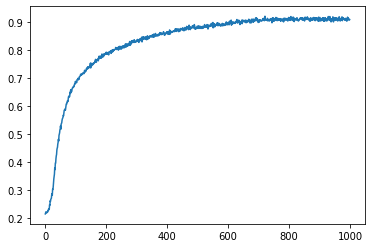

In [27]:
import matplotlib.pyplot as plt
plt.plot(metrics_ann.history['accuracy'])

In [ ]:
# Preprocessing
train_x = tf.squeeze(train_images)
train_x = tf.reshape(train_x, (942, 9,1))
print(train_x.shape, train_y.shape )

In [30]:

cnn_metric_train = cnn_model.fit(train_x, train_y, verbose=1, epochs=1000, batch_size = 10)

Epoch 1/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1355 - accuracy: 0.2102
Epoch 2/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1450 - accuracy: 0.2017
Epoch 3/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1446 - accuracy: 0.2059
Epoch 4/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1252 - accuracy: 0.2038
Epoch 5/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1188 - accuracy: 0.2070
Epoch 6/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1227 - accuracy: 0.2166
Epoch 7/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1237 - accuracy: 0.2176
Epoch 8/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1069 - accuracy: 0.2187
Epoch 9/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1122 - accuracy: 0.2081
Epoch 10/1000
95/95 [==============================] - 0s 2ms/step - loss: 2.1057 - accuracy: 0.2240

#4) Evaluate your model on your test set by using the .evaluate() function (8%)



In [32]:
metrics_test = ann_model.evaluate(test_images, test_y, verbose=1, batch_size=1)

942/942 [==============================] - 1s 1ms/step - loss: 0.1543 - accuracy: 0.9268


In [33]:
test_x = tf.squeeze(test_images)
test_x = tf.reshape(test_x, (942, 9,1))

In [34]:
cnn_metric_test = cnn_model.evaluate(test_images, test_y, verbose=1, batch_size=1)

942/942 [==============================] - 1s 1ms/step - loss: 1.9820 - accuracy: 0.2845


#5) Print accuarcy (2%)

In [29]:
accuracy = round(metrics_ann.history['accuracy'][-1] * 100, 2)
print(f"Train Set Accuracy of ANN Model: {accuracy} %")

accuracy = round(metrics_test[-1] * 100, 2)
print(f"Test Set Accuracy of ANN Model: {accuracy} %")

Train Set Accuracy of ANN Model: 90.98 %
Test Set Accuracy of ANN Model: 92.68 %


In [35]:
accuracy = round(cnn_metric_train.history['accuracy'][-1] * 100, 2)
print(f"Train Set Accuracy of CNN Model: {accuracy} %")

accuracy = round(cnn_metric_test[-1] * 100, 2)
print(f"Test Set Accuracy of CNN Model: {accuracy} %")

Train Set Accuracy of CNN Model: 24.42 %
Test Set Accuracy of CNN Model: 28.45 %


#6) use the network for predictions on the test dataset (5%)

In [ ]:
# ANN Predictions
predictions = ann_model(test_images)

#printing the predictions
for i in range(15):
    print(np.round(predictions[i]*1000)/1000, np.argmax(predictions[i]), test_labels[i])

[0.137 0.094 0.112 0.067 0.164 0.09  0.107 0.087 0.14 ] 4 [2.]
[0.133 0.087 0.106 0.058 0.203 0.076 0.124 0.075 0.137] 4 [0.]
[0.121 0.104 0.122 0.084 0.146 0.099 0.112 0.089 0.122] 4 [0.]
[0.13  0.096 0.111 0.07  0.168 0.092 0.109 0.093 0.131] 4 [1.]
[0.124 0.104 0.117 0.086 0.143 0.097 0.112 0.09  0.127] 4 [0.]
[0.125 0.093 0.11  0.071 0.178 0.09  0.115 0.089 0.128] 4 [2.]
[0.112 0.102 0.118 0.078 0.171 0.098 0.117 0.086 0.116] 4 [2.]
[0.127 0.098 0.116 0.079 0.158 0.091 0.111 0.084 0.135] 4 [1.]
[0.12  0.101 0.122 0.083 0.154 0.095 0.11  0.088 0.127] 4 [2.]
[0.127 0.098 0.131 0.077 0.161 0.094 0.098 0.082 0.133] 4 [2.]
[0.143 0.092 0.11  0.068 0.166 0.089 0.11  0.083 0.138] 4 [1.]
[0.129 0.097 0.117 0.078 0.155 0.091 0.112 0.091 0.131] 4 [2.]
[0.128 0.106 0.123 0.073 0.137 0.095 0.105 0.096 0.136] 4 [1.]
[0.13  0.091 0.111 0.064 0.179 0.088 0.117 0.091 0.129] 4 [0.]
[0.127 0.097 0.141 0.049 0.195 0.079 0.082 0.065 0.164] 4 [2.]


In [19]:
# CNN Predictions
predictions = cnn_model(test_x)

#printing the predictions
for i in range(15):
    print(np.round(predictions[i]*1000)/1000, np.argmax(predictions[i]), test_labels[i])

[0.132 0.105 0.097 0.096 0.107 0.117 0.12  0.1   0.126] 0 [0.]
[0.122 0.109 0.099 0.104 0.116 0.112 0.12  0.102 0.117] 0 [2.]
[0.128 0.107 0.097 0.1   0.111 0.113 0.115 0.102 0.127] 0 [2.]
[0.128 0.107 0.097 0.1   0.111 0.113 0.115 0.102 0.127] 0 [2.]
[0.122 0.109 0.099 0.104 0.116 0.112 0.12  0.102 0.117] 0 [2.]
[0.128 0.107 0.097 0.098 0.11  0.114 0.116 0.101 0.128] 8 [1.]
[0.122 0.11  0.098 0.098 0.112 0.114 0.122 0.1   0.125] 8 [1.]
[0.122 0.109 0.097 0.1   0.114 0.113 0.121 0.1   0.124] 8 [2.]
[0.126 0.108 0.097 0.096 0.11  0.117 0.126 0.099 0.122] 6 [0.]
[0.122 0.109 0.099 0.104 0.116 0.112 0.12  0.102 0.117] 0 [2.]
[0.122 0.109 0.099 0.104 0.116 0.112 0.12  0.102 0.117] 0 [2.]
[0.122 0.109 0.099 0.104 0.116 0.112 0.12  0.102 0.117] 0 [1.]
[0.111 0.113 0.104 0.095 0.109 0.117 0.136 0.098 0.117] 6 [1.]
[0.113 0.108 0.1   0.1   0.104 0.114 0.151 0.094 0.117] 6 [0.]
[0.113 0.108 0.1   0.1   0.104 0.114 0.151 0.094 0.117] 6 [0.]


#7) Save your model (5%)

In [20]:
ann_model.save_weights("/content/ANN_MODEL.h5")

In [21]:
cnn_model.save_weights("/content/CNN_MODEL.h5")

#7) Play the game against the computer 10 times, and show how many times the computer won the game. (10%)
Answer the following question:
Based on your win-loss ratio with the computer, Do you think your model is working really well? 
Do you think playing just 10 times is enough to come to a conclusion? 
What else can we check to see how well the model is performing on the unseen data? 



### **ANSWER**
An approximate conclusion can be made by playing only 10 games as it gives us the policy learned by the neural network for optimizing the moves. More defencive moves are played by CNN and ANN agents. 

There can be two methods to check the model. 
1. AI vs Players with random player by picking random moves. For example numpy.random.randint(0,8) can be used to get a random position. 

This will provide how well is Artificial player as compared to a random player. 

2. CNN Model vs ANN Model can also be selected as competing players. Which will provide a firm estimation of the best model. 


In the report, For each network, explain your choices of the model structre and all the parameters that you've chose and why? If you've done different experiments explain your outcomes.

### **ANN PLAY**

In [36]:
#board positions
board = [0,0,0,0,0,0,0,0,0]

#checking for a win in the actual tic tac toe game
def checkForWin(x):
    if board[0] == x and board[1] == x and board[2] == x:
        return True
    if board[3] == x and board[4] == x and board[5] == x:
        return True
    if board[6] == x and board[7] == x and board[8] == x:
        return True
    if board[0] == x and board[3] == x and board[6] == x:
        return True
    if board[1] == x and board[4] == x and board[7] == x:
        return True
    if board[2] == x and board[5] == x and board[8] == x:
        return True
    if board[0] == x and board[4] == x and board[8] == x:
        return True
    if board[2] == x and board[4] == x and board[6] == x:
        return True
    else:
        return False

print("X is 1, O is -1, empty spaces are 0")

#tictac toe game loop
def mainloop():
    mainloop = True
    while mainloop== True:
        x = np.array([board], dtype="float")
        print(x[0][0:3], "\n")
        print(x[0][3:6], "\n")
        print(x[0][6:9], "\n")
        i = int(input("Enter board pos: "))
        if board[i] == 0:
            board[i] = 1 #filling board position
            #drawing X
            #checks if either player won or draw
            xwin = checkForWin(1)
            ywin = checkForWin(-1)
            if xwin:
                print("X wins!")
                print(x[0][0:3], "\n")
                print(x[0][3:6], "\n")
                print(x[0][6:9], "\n")
                mainloop = False
                break
            elif 0 not in board and not ywin and not xwin:
                print("Draw!")
                mainloop = False
                break
            #neural network runs a prediction to get the best move
            predictions = ann_model.predict(np.array([board], dtype="float"))
            space = np.argmax(predictions)
            board[space] = -1 #populating board
        #checking for win for O
        ywin = checkForWin(-1)
        x = np.array([board], dtype="float")
        if ywin:
            print(x[0][0:3], "\n")
            print(x[0][3:6], "\n")
            print(x[0][6:9], "\n")
            print("Y wins!")
            mainloop = False
            break
        if not mainloop:
            break

#putting everything together
while 1:
    mainloop();
    if input("Play again?: ") == "no":
        break;
    board = [0,0,0,0,0,0,0,0,0]

X is 1, O is -1, empty spaces are 0
[0. 0. 0.] 

[0. 0. 0.] 

[0. 0. 0.] 

Enter board pos: 7
[0. 0. 0.] 

[0. 0. 0.] 

[-1.  1.  0.] 

Enter board pos: 4
[ 0. -1.  0.] 

[0. 1. 0.] 

[-1.  1.  0.] 

Enter board pos: 0
[ 1. -1.  0.] 

[0. 1. 0.] 

[-1.  1. -1.] 

Enter board pos: 3
[ 1. -1.  0.] 

[ 1.  1. -1.] 

[-1.  1. -1.] 

Enter board pos: 2
Draw!
Play again?: y
[0. 0. 0.] 

[0. 0. 0.] 

[0. 0. 0.] 

Enter board pos: 0
[1. 0. 0.] 

[0. 0. 0.] 

[ 0.  0. -1.] 

Enter board pos: 2
[ 1. -1.  1.] 

[0. 0. 0.] 

[ 0.  0. -1.] 

Enter board pos: 5
[ 1. -1.  1.] 

[ 0. -1.  1.] 

[ 0.  0. -1.] 

Enter board pos: 7
[-1. -1.  1.] 

[ 0. -1.  1.] 

[ 0.  1. -1.] 

Y wins!
Play again?: no


### **CNN PLAY**

In [38]:
board = [0,0,0,0,0,0,0,0,0]
def mainloop():
    mainloop = True
    while mainloop== True:
        x = np.array([board], dtype="float")
        print(x[0][0:3], "\n")
        print(x[0][3:6], "\n")
        print(x[0][6:9], "\n")
        i = int(input("Enter board pos: "))
        if board[i] == 0:
            board[i] = 1 #filling board position
            #drawing X
            #checks if either player won or draw
            xwin = checkForWin(1)
            ywin = checkForWin(-1)
            if xwin:
                print("X wins!")
                print(x[0][0:3], "\n")
                print(x[0][3:6], "\n")
                print(x[0][6:9], "\n")
                mainloop = False
                break
            elif 0 not in board and not ywin and not xwin:
                print("Draw!")
                mainloop = False
                break
            #neural network runs a prediction to get the best move
            my_array = np.array([board], dtype="float")
            sample = tf.squeeze(my_array)
            sample = tf.reshape(sample, (1,9,1))

            predictions = cnn_model.predict(sample)
            space = np.argmax(predictions)
            board[space] = -1 #populating board
        #checking for win for O
        ywin = checkForWin(-1)
        x = np.array([board], dtype="float")
        if ywin:
            print(x[0][0:3], "\n")
            print(x[0][3:6], "\n")
            print(x[0][6:9], "\n")
            print("Y wins!")
            mainloop = False
            break
        if not mainloop:
            break

#putting everything together
while 1:
    mainloop();
    if input("Play again?: ") == "no":
        break;
    board = [0,0,0,0,0,0,0,0,0]

[0. 0. 0.] 

[0. 0. 0.] 

[0. 0. 0.] 

Enter board pos: 0
[ 1.  0. -1.] 

[0. 0. 0.] 

[0. 0. 0.] 

Enter board pos: 5
[ 1.  0. -1.] 

[0. 0. 1.] 

[0. 0. 0.] 

Enter board pos: 4
[-1.  0. -1.] 

[0. 1. 1.] 

[0. 0. 0.] 

Enter board pos: 2
[-1.  0. -1.] 

[0. 1. 1.] 

[0. 0. 0.] 

Enter board pos: 1
[-1.  1. -1.] 

[0. 1. 1.] 

[-1.  0.  0.] 

Enter board pos: 3
X wins!
[-1.  1. -1.] 

[0. 1. 1.] 

[-1.  0.  0.] 

Play again?: 2
[0. 0. 0.] 

[0. 0. 0.] 

[0. 0. 0.] 



KeyboardInterrupt: ignored